# My code for Week 1 of [Advent of Code 2018](https://adventofcode.com/2018/)

In [422]:
# Imports & Utils
import numpy as np
import matplotlib.pyplot as plt
import datetime
import operator
import re
import string
%matplotlib notebook

## Day 1: Chronal Calibration

In [383]:
lines = open('input/input-day1.txt').readlines()

In [384]:
def parse_line(line):
    num = int(line[1:])
    return -num if line[0] == '-' else num

In [385]:
# Task 1
sum = 0
for line in lines:
    sum += parse_line(line)
print(sum)

433


In [386]:
# Task 2
sum = 0
freqs = { 0 : True }

found = False
while not found:
    for line in lines:
        sum += parse_line(line)
        if sum in freqs:
            print(sum)
            found = True
            break
        freqs[sum] = True

256


## Day 2: Inventory Management System

In [387]:
lines = open('input/input-day2.txt').readlines()

In [388]:
def parse_line(line):
    two = False
    three = False
    for char in line:
        count = line.count(char)
        if count == 2:
            two = True
        elif count == 3:
            three = True
    return two, three

In [389]:
# Task 1
two_count = 0
three_count = 0
for line in lines:
    two, three = parse_line(line)
    if two:
        two_count += 1
    if three:
        three_count += 1
print(two_count * three_count)

5704


In [390]:
# Task 2
def num_diffs(s1, s2):
    count = 0
    for index, char in enumerate(s1):
        if char != s2[index]:
            count += 1
    return count

for line1 in lines:
    for line2 in lines:
        if num_diffs(line1, line2) == 1:
            print(line1)
            print(line2)

umdryabviapkozistwcnihjqxg

umdryabviapkozistwcnihjqxd

umdryabviapkozistwcnihjqxd

umdryabviapkozistwcnihjqxg



## Day 3: No Matter How You Slice It 

In [391]:
lines = open('input/input-day3.txt').readlines()

In [392]:
class Rectangle:
    def __init__(self, id: str, start_pos, size):
        self.id = id
        self.start_pos = start_pos
        self.size = size

def parse_line(line) -> Rectangle:
    split = line.split()
    id = int(split[0][1:])
    start_pos = np.array([int(pos) for pos in split[2][:-1].split(',')])
    size = np.array([int(pos) for pos in split[3].split('x')])
    return Rectangle(id, start_pos, size)

In [393]:
# Task 1: How many square inches of fabric are within two or more claims?
fabric_size = 1000
fabric = np.zeros((fabric_size, fabric_size), dtype=int)
for line in lines:
    rect = parse_line(line)
    s = rect.start_pos
    e = rect.start_pos + rect.size
    fabric[s[0]:e[0], s[1]:e[1]] += 1

<IPython.core.display.Javascript object>


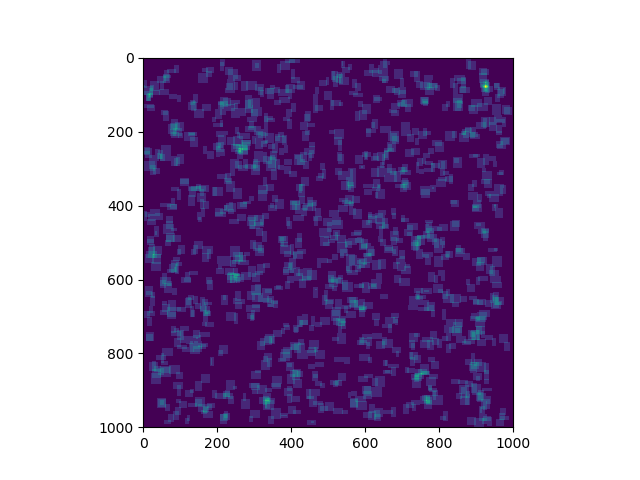

In [423]:
plt.figure()
plt.imshow(fabric)
plt.show()

In [395]:
print(len(fabric[fabric > 1]))

113716


In [396]:
# Task 2: What is the ID of the only claim that doesn't overlap?
for line in lines:
    rect = parse_line(line)
    s = rect.start_pos
    e = rect.start_pos + rect.size
    sum = np.sum(fabric[s[0]:e[0], s[1]:e[1]])
    
    if rect.size[0] * rect.size[1] == sum:
        print('Claim that does not overlap: ', rect.id)

Claim that does not overlap:  742


## Day 4: Repose Record

In [397]:
lines = open('input/input-day4.txt').readlines()

### Task 1: Find the guard that has the most minutes asleep. What minute does that guard spend asleep the most?

In [398]:
# First sort input
timestamps = []
events = []
for line in lines:
    # e.g. [1518-11-01 00:05] falls asleep
    t = datetime.datetime.strptime(line[1:17], "%Y-%m-%d %H:%M")
    timestamps.append(t)
    events.append(line[19:])

sorted_events = sorted(zip(timestamps, events))

In [399]:
sleep_times = {} # dict of ID -> array of amount of sleep times per minute
current_id = ''
current_sleep_time = ''
for [timestamp, event] in sorted_events:
    if event.startswith('Guard'):
        current_id = int(event.split(' ')[1][1:])
        if current_id not in sleep_times:
            sleep_times[current_id] = np.zeros(60, dtype=int)
    elif event.startswith('falls asleep'):
        current_sleep_time = timestamp
    else:
        sleep_times[current_id][current_sleep_time.minute:timestamp.minute] += 1

sum_sleep_times = {}
for id in sleep_times:
    sum_sleep_times[id] = np.sum(sleep_times[id])

longest_sleep = max(sum_sleep_times.items(), key=operator.itemgetter(1))[0]
print('Guard with longest sleep: #', longest_sleep)

max_minute = np.argmax(sleep_times[longest_sleep])
print('Minute with max sleep: ', max_minute)

Guard with longest sleep: # 2593
Minute with max sleep:  40


In [400]:
# What is the ID of the guard you chose multiplied by the minute you chose?
print(longest_sleep * max_minute)

103720


### Task 2: Of all guards, which guard is most frequently asleep on the same minute?

In [401]:
total_max_sleep = 0
total_max_minute = 0
total_max_id = ''
for id in sleep_times:
    max_sleep = np.max(sleep_times[id])
    if max_sleep > total_max_sleep:
        total_max_sleep = max_sleep
        total_max_id = id
        total_max_minute = np.argmax(sleep_times[id])
prnt_str = 'Guard #{} is most frequently asleep on a specific minute, namely {} times on minute {}'
print(prnt_str.format(total_max_id, total_max_sleep, total_max_minute))

Guard #3361 is most frequently asleep on a specific minute, namely 17 times on minute 33


In [402]:
# What is the ID of the guard you chose multiplied by the minute you chose?
print(total_max_id * total_max_minute)

110913


In [403]:
img_matrix = np.zeros((len(sleep_times), 60))
for index, id in enumerate(sleep_times):
    img_matrix[index, :] = sleep_times[id]

<IPython.core.display.Javascript object>


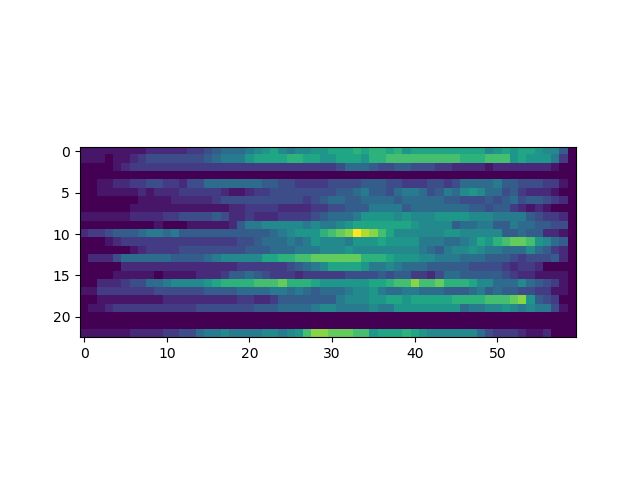

In [404]:
plt.figure()
plt.imshow(img_matrix)
plt.show()

## Day 5: Alchemical Reduction

### Task 1: How many units remain after fully reacting the polymer you scanned?

In [405]:
lines = open('input/input-day5.txt').readlines()
polymer = lines[0][:-1] # remove \n at end

# Convert to ints for performance
num_polymer = np.array([ord(x) for x in polymer])

lower_upper_dist = ord('a') - ord('A')
def reacts(a, b):
    return abs(b - a) == lower_upper_dist

def polymer_length(polymer):
    length = polymer.size
    is_done = False
    start_index = 0
    while not is_done:
        for i in range(start_index, length):
            if i == length - 1:
                is_done = True
                break
            elif i > 0:
                a = polymer[i - 1]
                b = polymer[i]
                if reacts(a, b):
                    polymer[i - 1:length - 2] = polymer[i + 1:length]
                    length -= 2
                    start_index = i - 1
                    break
    return length - 2

In [406]:
print(polymer_length(num_polymer))

11668


## Task 2: What is the length of the shortest polymer you can produce by removing all units of exactly one type and fully reacting the result?

In [407]:
min_len = 99999
for char in string.ascii_lowercase:
    filtered_polymer = re.sub('{}|{}'.format(char, char.upper()), '', polymer)
    num_polymer = np.array([ord(x) for x in filtered_polymer])
    poly_len = polymer_length(num_polymer)
    if poly_len < min_len:
        min_len = poly_len
print(min_len)

4652


## Day 6: Chronal Coordinates

### Task 1: What is the size of the largest area that isn't infinite?

In [408]:
lines = open('input/input-day6.txt').readlines()

In [409]:
def mhtn_dist(p1, p2):
    return abs(p1[0] - p2[0]) + abs(p1[1] - p2[1])

Idea: Get the max dimensions of the grid, mark the points at min/max positions at both axis as invalid, and just count the closest grid points for the others

Post-idea: OK that almost worked, but we need some padding since some areas might extend outside of the grid that are not infinite

In [410]:
points = []
min_pos = [999, 999]
max_pos = [0, 0]
for line in lines:
    pos = [int(s) for s in line.split(', ')]
    points.append(pos)
    min_pos = [min(min_pos[i], pos[i]) for i in range(2)]
    max_pos = [max(max_pos[i], pos[i]) for i in range(2)]
print('Min: {}, Max: {}'.format(min_pos, max_pos))

Min: [43, 40], Max: [356, 353]


In [411]:
padding = 32

def closest_point(x, y):
    # Remove min pos since the grid starts there
    x += min_pos[0] - padding / 2
    y += min_pos[1] - padding / 2
    
    this_point = [x, y]
    closest_index = -1
    closest_dist = 999
    equal = False
    for i, pos in enumerate(points):
        dist = mhtn_dist(this_point, pos)
        if dist < closest_dist:
            closest_dist = dist
            equal = False
            closest_index = i
        elif dist == closest_dist:
            equal = True
    return -1 if equal else closest_index

# Create grid

shape = [max_pos[0] - min_pos[0] + padding, max_pos[1] - min_pos[1] + padding]
grid = np.fromfunction(np.vectorize(closest_point), shape)

<IPython.core.display.Javascript object>


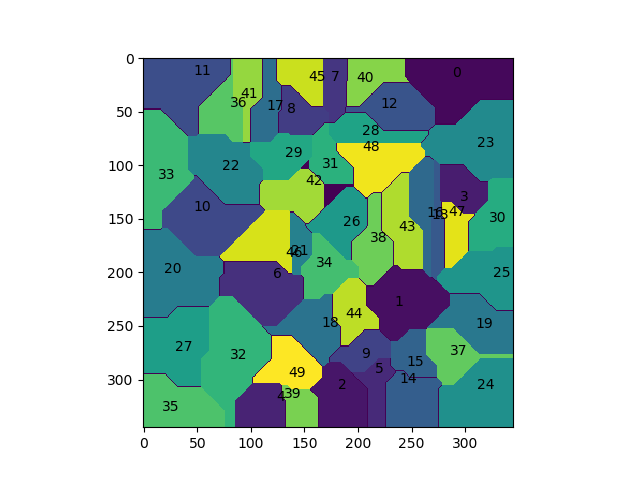

In [412]:
plt.figure()
plt.imshow(grid)
for i, [x, y] in enumerate(points):
    plt.text(y + padding / 2 - min_pos[0], x + padding / 2 - min_pos[0], i)
plt.show()

<IPython.core.display.Javascript object>


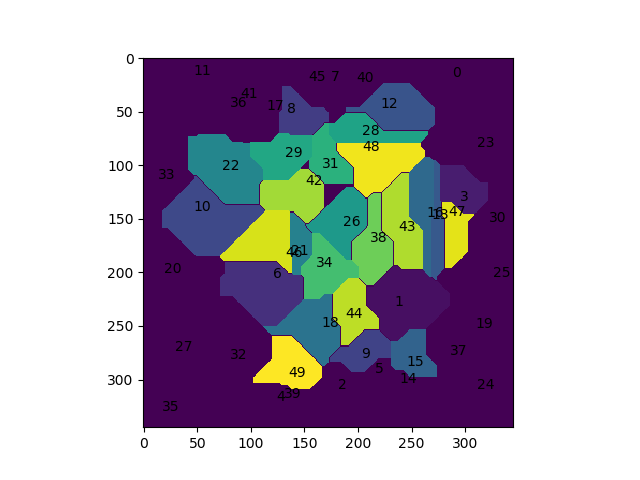

In [413]:
def invalidate(value):
    if value is not -1:
        grid[grid == value] = -1
# Now make all infinitely extending ones invalid
for loop_index in range(grid.shape[0]):
    invalidate(grid[loop_index, 0])
    invalidate(grid[loop_index, grid.shape[1] - 1])
    invalidate(grid[0, loop_index])
    invalidate(grid[grid.shape[1] - 1, loop_index])

plt.figure()
plt.imshow(grid)
for i, [x, y] in enumerate(points):
    plt.text(y + padding / 2 - min_pos[0], x + padding / 2 - min_pos[0], i)
plt.show()

In [414]:
# Now simply count!
counts = []
for i in range(len(points)):
    counts.append(np.sum(grid == i))
print(max(counts))

3894


### Task 2: What is the size of the region containing all locations which have a total distance to all given coordinates of less than 10000?

In [415]:
padding = 0
def total_distance(x, y):
    # Remove min pos since the grid starts there
    x += min_pos[0] - padding / 2
    y += min_pos[1] - padding / 2
    
    this_point = [x, y]
    total_dist = 0
    for i, pos in enumerate(points):
        total_dist += mhtn_dist(this_point, pos)
    return total_dist

shape = [max_pos[0] - min_pos[0] + padding, max_pos[1] - min_pos[1] + padding]
grid = np.fromfunction(np.vectorize(total_distance), shape)
print(np.sum(grid < 10000))

39398


## Day 7: The Sum of Its Parts

In [416]:
lines = open('input/input-day7.txt').readlines()

### Task 1: In what order should the steps in your instructions be completed?

In [417]:
instructions = {}
possible_steps = []
for line in lines:
    step_1 = line[5]
    step_2 = line[36]
    
    if step_1 not in instructions:
        instructions[step_1] = []
    if step_2 not in instructions:
        instructions[step_2] = []
    instructions[step_2].append(step_1)
    
    if step_1 not in possible_steps:
        possible_steps.append(step_1)
    if step_2 not in possible_steps:
        possible_steps.append(step_2)

possible_steps = sorted(possible_steps)
for step in possible_steps:
    print(step, 'depends on', instructions[step])

possible_steps_bak = possible_steps.copy()
instructions_bak = {}
for step in possible_steps_bak:
    instructions_bak[step] = instructions[step].copy()

A depends on ['G', 'D', 'O', 'N', 'L', 'R', 'E', 'Y']
B depends on ['Q', 'Z', 'X', 'A', 'L', 'M', 'C', 'W', 'K', 'E']
C depends on ['M', 'O', 'T', 'Q', 'S', 'N', 'U', 'A']
D depends on ['F']
E depends on ['S']
F depends on []
G depends on ['S']
H depends on ['F', 'U', 'P', 'N']
I depends on ['Q', 'O', 'Y']
J depends on ['G']
K depends on ['P', 'F', 'E']
L depends on ['E']
M depends on ['D', 'K', 'J', 'O', 'Y', 'E']
N depends on ['P', 'L']
O depends on ['N', 'Y', 'P']
P depends on ['S']
Q depends on ['Y']
R depends on ['D', 'J']
S depends on []
T depends on ['E', 'U', 'L', 'G', 'F', 'D']
U depends on ['Y']
V depends on ['I', 'C', 'A', 'D', 'L', 'S', 'N']
W depends on ['Y', 'H', 'K', 'V', 'O', 'A', 'G', 'N', 'E']
X depends on ['C', 'W', 'V', 'A', 'I', 'O', 'Z', 'Q']
Y depends on ['D', 'J', 'R', 'P']
Z depends on ['P', 'L', 'T', 'O', 'A', 'S', 'V', 'Q', 'W', 'R']


In [418]:
order = []
num_of_steps = len(possible_steps)
while len(order) is not num_of_steps:
    for step in possible_steps:
        if len(instructions[step]) == 0:
            possible_steps.remove(step)
            order.append(step)
            for step2 in instructions:
                if step in instructions[step2]:
                    instructions[step2].remove(step)
            break
                
print(''.join(order))

FDSEGJLPKNRYOAMQIUHTCVWZXB


### With 5 workers and the 60+ second step durations described above, how long will it take to complete all of the steps?

In [419]:
num_workers = 5
def step_time(char):
    return 61 + ord(char) - ord('A')

In [420]:
class Worker:
    def __init__(self):
        self.end_time = -1
        self.step = ''
    def reset(self, step, current_time):
        self.step = step
        self.start_time = current_time
        self.end_time = current_time + step_time(step)
    def is_available(self, current_time):
        return current_time >= self.end_time

In [421]:
workers = []
for i in range(num_workers):
    workers.append(Worker())

possible_steps = possible_steps_bak.copy()
instructions = {}
for step in possible_steps_bak:
    instructions[step] = instructions_bak[step].copy()
    
time = 0    
order = []
num_of_steps = len(possible_steps)
while len(order) is not num_of_steps:
    for worker in workers:
        if worker.is_available(time):
            # Worker is finished, so previous step is done:
            if worker.step is not '' and worker.step not in order:
                order.append(worker.step)
                # Remove requirements of other steps to this step
                for step2 in instructions:
                    if worker.step in instructions[step2]:
                        instructions[step2].remove(worker.step)
            
            # Start work on new step
            for step in possible_steps:
                if len(instructions[step]) == 0:
                    possible_steps.remove(step)
                    worker.reset(step, time)
                    break
#     print('{}: {}'.format(time, ', '.join(w.step for w in workers)))
    time += 1
    
print(''.join(order))
print('It took {} seconds'.format(time - 2))

FSDEGPLJKNRYOQUAIMHTCVWZXB
It took 1000 seconds
